# Kim old vs new parsed 2017-11 dataset

Total entries in sprot_2017: 6703
Total entries in toxprot_2017: 6658
Entries only in sprot_2017: 46
Entries only in toxprot_2017: 1
Entries in both datasets: 6657


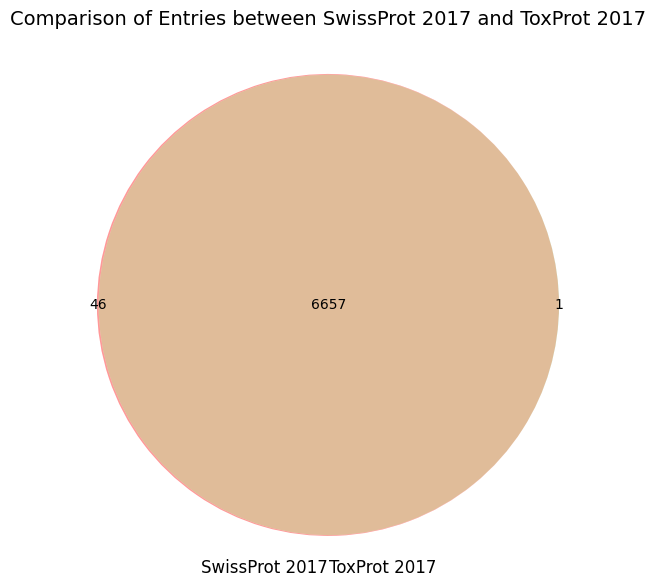


Sample entries only in SwissProt 2017:
['C0HKY9', 'P0DP97', 'P0DL78', 'B1P1E2', 'F1CGT6']

Sample entries only in ToxProt 2017:
['P49265']

Sample entries in both datasets:
['P0DN67', 'C0HJK4', 'Q9YGS1', 'Q8JFX9', 'Q9W7I3']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the datasets
sprot_2017 = pd.read_csv("../data/interim/toxprot_2017.csv")
toxprot_2017 = pd.read_csv("../data/interim/toxprot_2017_old.csv")

# Extract Entry columns and convert to sets
sprot_entries = set(sprot_2017["Entry"])
toxprot_entries = set(toxprot_2017["Entry"])

# Calculate set operations
only_sprot = sprot_entries - toxprot_entries
only_toxprot = toxprot_entries - sprot_entries
intersection = sprot_entries.intersection(toxprot_entries)

# Print summary statistics
print(f"Total entries in sprot_2017: {len(sprot_entries)}")
print(f"Total entries in toxprot_2017: {len(toxprot_entries)}")
print(f"Entries only in sprot_2017: {len(only_sprot)}")
print(f"Entries only in toxprot_2017: {len(only_toxprot)}")
print(f"Entries in both datasets: {len(intersection)}")

# Create Venn diagram
plt.figure(figsize=(10, 6))
venn = venn2(
    subsets=(len(only_sprot), len(only_toxprot), len(intersection)),
    set_labels=("SwissProt 2017", "ToxProt 2017"),
)

# Customize the Venn diagram
plt.title("Comparison of Entries between SwissProt 2017 and ToxProt 2017", fontsize=14)
for text in venn.set_labels:
    if text is not None:
        text.set_fontsize(12)
for text in venn.subset_labels:
    if text is not None:
        text.set_fontsize(10)

plt.tight_layout()
plt.show()

# Display a few examples from each set
print("\nSample entries only in SwissProt 2017:")
print(list(only_sprot)[:5])

print("\nSample entries only in ToxProt 2017:")
print(list(only_toxprot)[:5])

print("\nSample entries in both datasets:")
print(list(intersection)[:5])


# Downloaded 2025 version vs parsed from dataset

Total entries in toxprot_2025.csv: 8055
Total entries in toxprot_2025.tsv (parsed): 8055
Entries only in toxprot_2025.csv: 0
Entries only in toxprot_2025.tsv (parsed): 0
Entries in both 2025 datasets: 8055


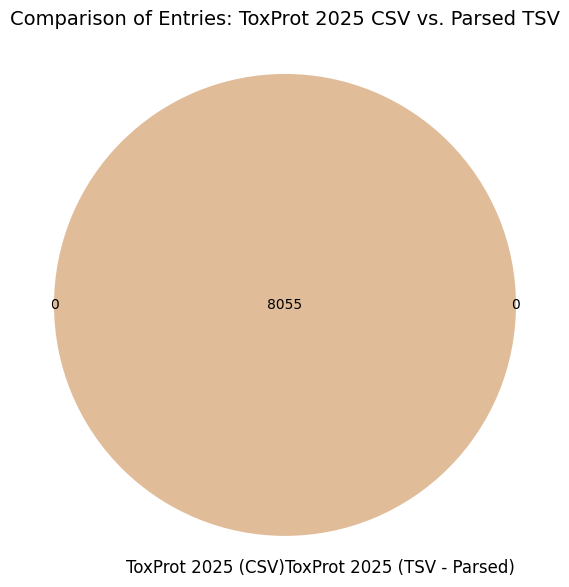


Sample entries only in ToxProt 2025 (CSV):
[]

Sample entries only in ToxProt 2025 (TSV - Parsed):
[]

Sample entries in both 2025 datasets:
['P0DN67', 'C0HJK4', 'Q9YGS1', 'Q8JFX9', 'Q9W7I3']


In [4]:
# Load the datasets for 2025 comparison
# Assuming 'Entry' is the common identifier column in both files.
# If the column name is different in toxprot_2025.csv, it needs to be adjusted.
try:
    df_csv_2025 = pd.read_csv(
        "../data/interim/toxprot_2025.csv", low_memory=False
    )  # low_memory=False can help with mixed types if any
    df_tsv_2025 = pd.read_csv("../data/interim/toxprot_2025.tsv", sep="\t")
except FileNotFoundError as e:
    print(f"Error loading 2025 data files: {e}")
    print(
        "Please ensure '../data/interim/toxprot_2025.csv' and '../data/interim/toxprot_2025.tsv' exist."
    )
    # Optionally, raise the error or exit if files are critical for subsequent steps
    # raise e

# Extract entry sets, ensuring they are strings and unique
# It's important to know the exact column name for entries in toxprot_2025.csv
# Assuming 'Entry' for both, consistent with previous cell and typical UniProt data.
if "Entry" not in df_csv_2025.columns:
    print(
        "Warning: 'Entry' column not found in toxprot_2025.csv. Please check column names."
    )
    # Fallback or error handling if 'Entry' is not the column
    # For now, proceeding with 'Entry', which might cause an error if not present.
entries_csv_2025 = set(df_csv_2025["Entry"].astype(str).unique())
entries_tsv_2025 = set(
    df_tsv_2025["Entry"].astype(str).unique()
)  # 'Entry' is the first column from parse_sprot_dat.py

# Calculate set operations for 2025 data
only_csv_2025 = entries_csv_2025 - entries_tsv_2025
only_tsv_2025 = entries_tsv_2025 - entries_csv_2025
intersection_2025 = entries_csv_2025.intersection(entries_tsv_2025)

# Print summary statistics for 2025 data
print(f"Total entries in toxprot_2025.csv: {len(entries_csv_2025)}")
print(f"Total entries in toxprot_2025.tsv (parsed): {len(entries_tsv_2025)}")
print(f"Entries only in toxprot_2025.csv: {len(only_csv_2025)}")
print(f"Entries only in toxprot_2025.tsv (parsed): {len(only_tsv_2025)}")
print(f"Entries in both 2025 datasets: {len(intersection_2025)}")

# Create Venn diagram for 2025 data
plt.figure(figsize=(10, 6))
venn_2025 = venn2(
    subsets=(len(only_csv_2025), len(only_tsv_2025), len(intersection_2025)),
    set_labels=("ToxProt 2025 (CSV)", "ToxProt 2025 (TSV - Parsed)"),
)

# Customize the Venn diagram for 2025 data
plt.title("Comparison of Entries: ToxProt 2025 CSV vs. Parsed TSV", fontsize=14)
if venn_2025.set_labels:  # Check if set_labels were generated
    for text in venn_2025.set_labels:
        if text is not None:
            text.set_fontsize(12)
if venn_2025.subset_labels:  # Check if subset_labels were generated
    for text in venn_2025.subset_labels:
        if text is not None:
            text.set_fontsize(10)

plt.tight_layout()
plt.show()

# Display a few examples from each set for 2025 data
print("\nSample entries only in ToxProt 2025 (CSV):")
print(list(only_csv_2025)[:5])

print("\nSample entries only in ToxProt 2025 (TSV - Parsed):")
print(list(only_tsv_2025)[:5])

print("\nSample entries in both 2025 datasets:")
print(list(intersection_2025)[:5])
